In [3]:
# Import packages

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [4]:
# Display full output, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# load data
df_movies = pd.read_csv("tmdb_5000_movies.csv", header='infer', encoding='latin1')
df_credits = pd.read_csv("tmdb_5000_credits.csv", header='infer', encoding='latin1')

In [6]:
# Display the top 5 rows
df_movies.head()
df_credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# Check data type
df_movies.dtypes
df_credits.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [8]:
# Total number of rows and columns
df_movies.shape
df_credits.shape

(4803, 20)

(4803, 4)

In [9]:
# Find duplicate rows
dup_rows_df = df_movies[df_movies.duplicated()]
dup_rows_df.shape

(0, 20)

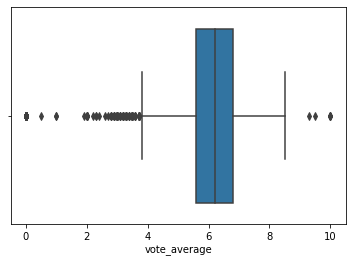

In [10]:
# Detecting outliers
sns.boxplot(x=df_movies['vote_average'])

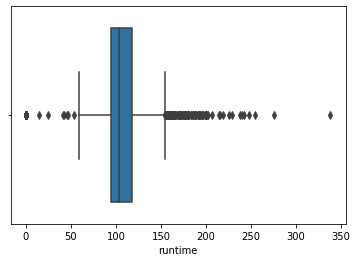

In [11]:
sns.boxplot(x=df_movies['runtime'])

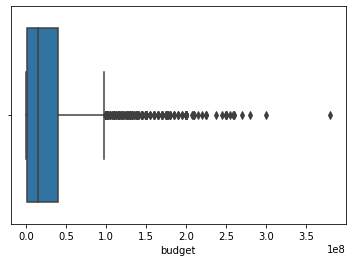

In [12]:
sns.boxplot(x=df_movies['budget'])

In [30]:
# Finding quantiles
Q1 = df_movies.quantile(0.25)
Q3 = df_movies.quantile(0.75)
IQR_movies = Q3 - Q1
print(IQR_movies)

budget          3.921000e+07
id              4.959600e+04
popularity      2.364543e+01
revenue         9.291719e+07
runtime         2.400000e+01
vote_average    1.200000e+00
vote_count      6.830000e+02
dtype: float64


In [32]:
# Number of rows after removing the outliers
df_movies_2 = df_movies[~((df_movies > (Q3+1.5*IQR_movies))|(df_movies < (Q1-1.5*IQR_movies))).any(axis=1)]
df_movies_2.shape

(3311, 20)

Text(0.5, 1.0, 'Number of Movies by Status')

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Status')

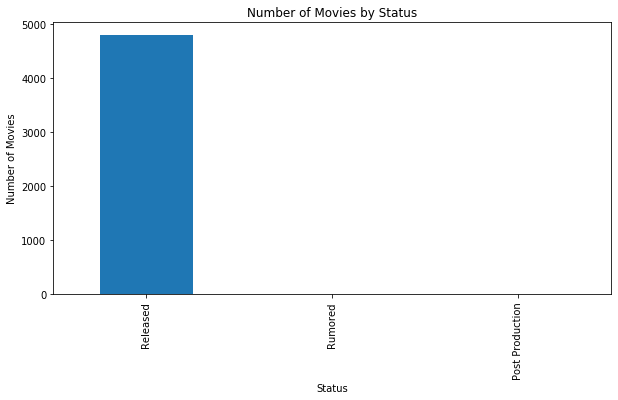

In [34]:
# Plotting variables

# Number of movies broken down by status 
df_movies.status.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Movies by Status")
plt.ylabel("Number of Movies")
plt.xlabel("Status")

Text(0.5, 1.0, 'Number of Movies by original Language')

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Original Language')

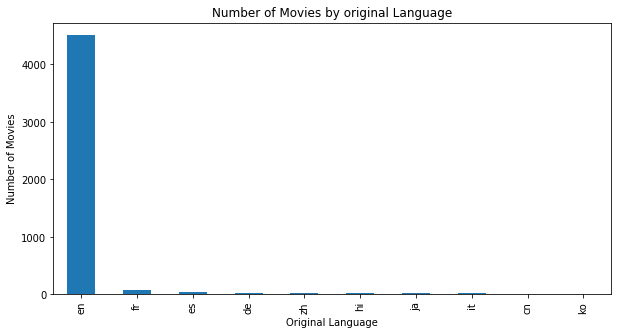

In [35]:
# Number of movies broken down by original language
df_movies.original_language.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of Movies by original Language")
plt.ylabel("Number of Movies")
plt.xlabel("Original Language")

<Figure size 1440x720 with 0 Axes>

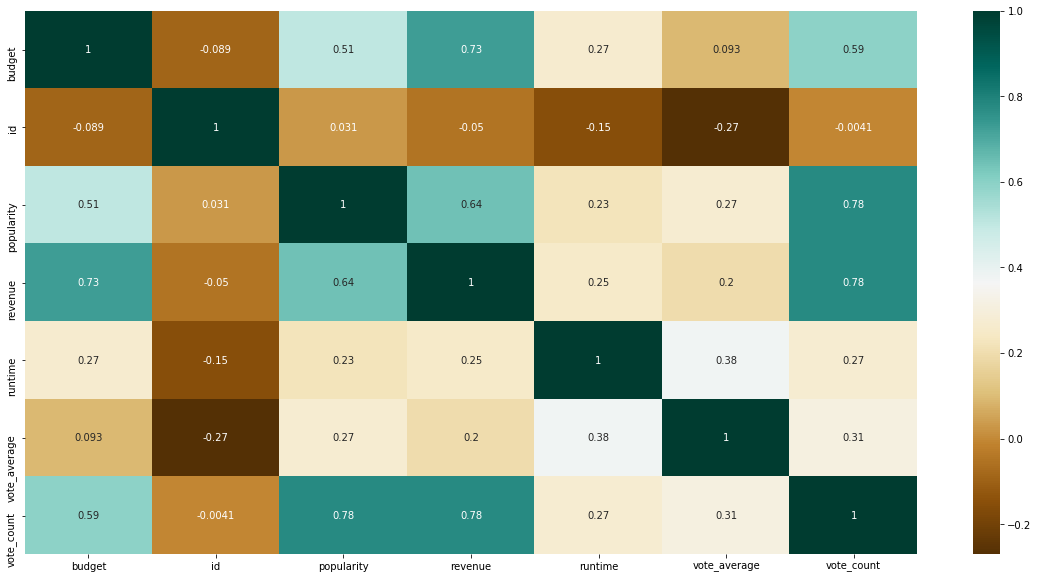

In [17]:
# Correlation heatmap
plt.figure(figsize=(20,10))
c = df_movies.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

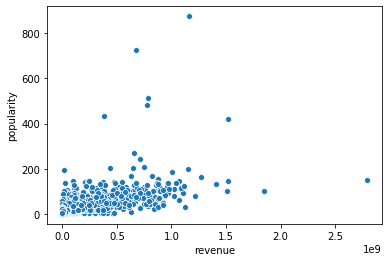

In [36]:
sns.scatterplot(x="revenue", y="popularity", data=df_movies)

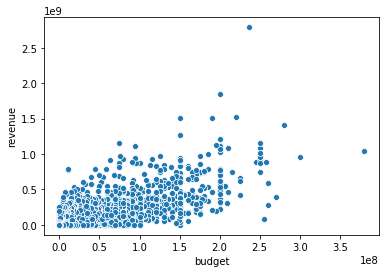

In [37]:
sns.scatterplot(x="budget", y="revenue", data=df_movies)